In [1]:
from time import time
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sys

sys.path.append("..")
from src.distance import euclidean

(32400,)


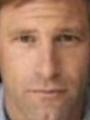

In [2]:
from IPython.display import display
from PIL import Image

img = cv.imread('../data/prepare/resized/Aaron_Eckhart_0001.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

print(img_rgb.flatten().shape)
display(Image.fromarray(img_rgb))

In [3]:
import os
resized_path = "../data/prepare/resized"

def to_feature(image_name):
    file_path = os.path.join(resized_path, image_name)
    img = cv.imread(file_path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img_rgb.flatten()

features = [ to_feature(name) for name in os.listdir(resized_path)]
print(features)

[array([ 86,  62,  34, ..., 103, 105, 102], dtype=uint8), array([18, 16,  4, ...,  9, 10,  5], dtype=uint8), array([ 96,  76,  78, ..., 111,  90,  95], dtype=uint8), array([117,  89,  39, ..., 146, 148, 137], dtype=uint8), array([  2,   1,   0, ..., 149, 157, 160], dtype=uint8), array([ 61,  33,   9, ..., 202, 196, 184], dtype=uint8), array([ 75,  49,  36, ..., 125,  85,  60], dtype=uint8), array([ 35,  54,  52, ..., 128,  90,  28], dtype=uint8), array([59, 54, 35, ..., 37, 34, 51], dtype=uint8), array([38, 24, 39, ..., 26, 27, 31], dtype=uint8), array([ 54,  60,  56, ...,  71, 121, 156], dtype=uint8), array([12,  9,  0, ..., 37, 33, 70], dtype=uint8), array([114,  79,  23, ...,  66,  39,  10], dtype=uint8), array([146, 114, 101, ...,  15,  13,  16], dtype=uint8), array([ 51,  51,  51, ..., 101, 107, 103], dtype=uint8), array([105,  87,  73, ..., 116,  95,  64], dtype=uint8), array([122,  91,  63, ..., 227, 222, 219], dtype=uint8), array([149, 122,  79, ..., 232, 225, 232], dtype=uint8

In [4]:
import numpy as np 
features_mat = np.asarray(features)


# normalize
def image_normalize(image_mat):
    new_mat = np.copy(image_mat)
    new_mat = new_mat / 255
    return new_mat 

features_mat =  image_normalize(features_mat)

print(features_mat.shape)

(5749, 32400)


In [5]:
# Build the pca model

n_components = 384

t0 = time()
pca = PCA(n_components=n_components, svd_solver="auto", whiten=True).fit(features_mat)
print("done in %0.3fs" % (time() - t0))



done in 19.593s


In [6]:
import torch
pred_embed = pca.transform(features_mat[0].reshape((1, -1))) 
features_embed = pca.transform(features_mat) 

print(pred_embed.shape, features_embed.shape)

pred_embed, target_embed = torch.from_numpy(pred_embed), torch.from_numpy(features_embed[0])
euclidean(pred_embed, target_embed)

(1, 384) (5749, 384)


tensor([1.9596e-05], dtype=torch.float64)

(120, 90, 3)
(120, 90)


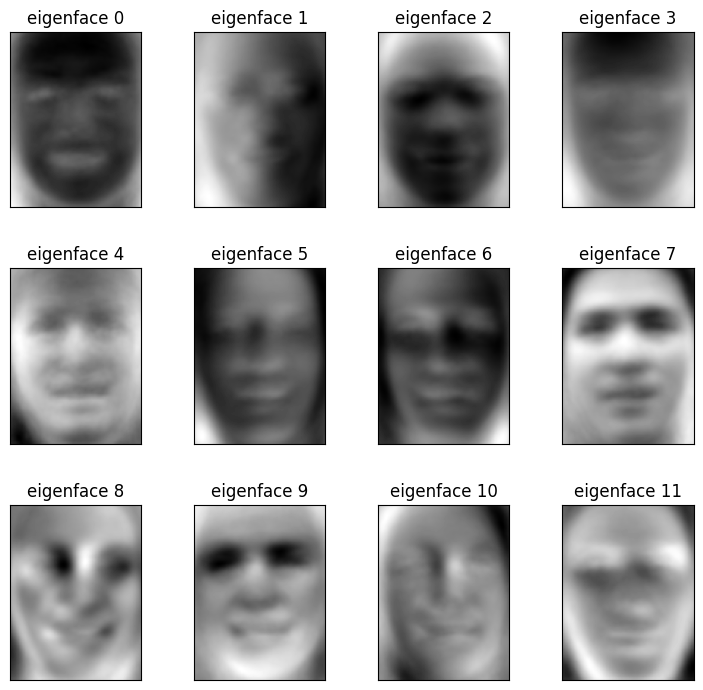

In [7]:
# plot the eigenfaces

def to_gray_eigenface(eigenface):
    return eigenface[..., :3] @ [0.299, 0.587, 0.114]

def plot_gallery(images, titles, h=120, w=90, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


eigenfaces = pca.components_.reshape((n_components, 120, 90, 3))
print(eigenfaces[0].shape)

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
gray_eigenfaces = [to_gray_eigenface(eigenface) for eigenface in eigenfaces[:20]]
print(gray_eigenfaces[0].shape)


plot_gallery(gray_eigenfaces, eigenface_titles)

In [8]:
# generate the embedding data

image_names = [ name for name in os.listdir(resized_path)]
print(image_names)

all_embeddings = pca.transform(features_mat)
print(all_embeddings.shape)

zipped = zip(image_names, all_embeddings)
embed_dict = { name:embed for (name, embed) in zipped}
embed_dict

['Aaron_Eckhart_0001.jpg', 'Aaron_Guiel_0001.jpg', 'Aaron_Patterson_0001.jpg', 'Aaron_Peirsol_0001.jpg', 'Aaron_Pena_0001.jpg', 'Aaron_Sorkin_0001.jpg', 'Aaron_Tippin_0001.jpg', 'Abbas_Kiarostami_0001.jpg', 'Abba_Eban_0001.jpg', 'Abdel_Aziz_Al-Hakim_0001.jpg', 'Abdel_Madi_Shabneh_0001.jpg', 'Abdel_Nasser_Assidi_0001.jpg', 'Abdoulaye_Wade_0001.jpg', 'Abdulaziz_Kamilov_0001.jpg', 'Abdullah_0001.jpg', 'Abdullah_Ahmad_Badawi_0001.jpg', 'Abdullah_al-Attiyah_0001.jpg', 'Abdullah_Gul_0001.jpg', 'Abdullah_Nasseef_0001.jpg', 'Abdullatif_Sener_0001.jpg', 'Abdul_Majeed_Shobokshi_0001.jpg', 'Abdul_Rahman_0001.jpg', 'Abel_Aguilar_0001.jpg', 'Abel_Pacheco_0001.jpg', 'Abid_Hamid_Mahmud_Al-Tikriti_0001.jpg', 'Abner_Martinez_0001.jpg', 'Abraham_Foxman_0001.jpg', 'Aby_Har-Even_0001.jpg', 'Adam_Ant_0001.jpg', 'Adam_Freier_0001.jpg', 'Adam_Herbert_0001.jpg', 'Adam_Kennedy_0001.jpg', 'Adam_Mair_0001.jpg', 'Adam_Rich_0001.jpg', 'Adam_Sandler_0001.jpg', 'Adam_Scott_0001.jpg', 'Adelina_Avila_0001.jpg', 'Adel_

{'Aaron_Eckhart_0001.jpg': array([-2.55721414e-01,  1.99489353e+00, -7.38155423e-01,  5.91850591e-02,
        -3.19848970e-01, -5.41057437e-01,  1.45010960e-01, -7.09334598e-02,
        -3.47713651e-01,  3.12618190e-02, -5.42329628e-01, -5.64790058e-01,
         4.00011819e-01, -6.92907741e-01, -6.07259824e-01,  1.11843816e-01,
         6.80469670e-01,  2.29939666e-01,  3.41163961e-01, -1.49698998e+00,
         2.46611139e-01,  3.93822826e-01, -1.86215423e+00, -5.41060772e-01,
        -5.56146227e-02, -1.95396004e-01, -3.46636207e-01, -7.43412056e-01,
        -5.53644559e-02,  9.77912269e-01,  4.65814268e-01,  6.80607840e-01,
         6.23469095e-01,  1.23244123e+00, -3.95721531e-01,  4.57715962e-01,
         1.04119352e+00, -6.10236787e-01, -5.28769545e-01, -8.53141511e-01,
        -1.14177336e-01,  8.63120781e-01,  1.20479134e+00, -6.16856013e-01,
        -3.89749066e-01, -7.32373889e-01, -2.14643353e-01, -5.38229943e-01,
        -4.64562186e-01,  6.08904199e-01, -9.24261472e-01, -9.

In [9]:
# store the embeddings 
import h5py

f = h5py.File("../data/eigenface_embeds.h5", "w")
f.create_dataset('names', data=image_names)
f.create_dataset('embeds', data=all_embeddings)

f.close()

In [10]:
h5f = h5py.File('../data/eigenface_embeds.h5','r')
print(h5f['names'][0])

print(h5f['embeds'][0])
h5f.close()

b'Aaron_Eckhart_0001.jpg'
[-2.55721414e-01  1.99489353e+00 -7.38155423e-01  5.91850591e-02
 -3.19848970e-01 -5.41057437e-01  1.45010960e-01 -7.09334598e-02
 -3.47713651e-01  3.12618190e-02 -5.42329628e-01 -5.64790058e-01
  4.00011819e-01 -6.92907741e-01 -6.07259824e-01  1.11843816e-01
  6.80469670e-01  2.29939666e-01  3.41163961e-01 -1.49698998e+00
  2.46611139e-01  3.93822826e-01 -1.86215423e+00 -5.41060772e-01
 -5.56146227e-02 -1.95396004e-01 -3.46636207e-01 -7.43412056e-01
 -5.53644559e-02  9.77912269e-01  4.65814268e-01  6.80607840e-01
  6.23469095e-01  1.23244123e+00 -3.95721531e-01  4.57715962e-01
  1.04119352e+00 -6.10236787e-01 -5.28769545e-01 -8.53141511e-01
 -1.14177336e-01  8.63120781e-01  1.20479134e+00 -6.16856013e-01
 -3.89749066e-01 -7.32373889e-01 -2.14643353e-01 -5.38229943e-01
 -4.64562186e-01  6.08904199e-01 -9.24261472e-01 -9.15412423e-01
 -1.30909615e-01  7.48923575e-01  1.70611739e-01 -2.45873208e-01
  7.85783243e-01  5.69305904e-01  6.48411455e-01 -1.50139873e+00